# Dataset - Network Intrusion Detection
https://www.kaggle.com/datasets/gauravduttakiit/network-intrusion-detection

### About Dataset


This dataset contains 5000 records of features extracted from Network Port Statistics to protect modern-day computer networks from cyber attacks and are thereby classified into 5 classes:
<br />Normal:0,
<br />Blackhole:1,
<br />TCP-SYN:2,
<br />PortScan:3,
<br />Diversion:4,
<br />Overflow:5

<br />Switch ID - The switch through which the network flow passed
<br />Port Number - The switch port through which the flow passed
<br />Received Packets - Number of packets received by the port
<br />Received Bytes - Number of bytes received by the port
<br />Sent Bytes - Number of bytes sent by the port
<br />Sent Packets - Number of packets sent by the port
<br />Port alive Duration (S) - The time port has been alive in seconds
<br />Packets Rx Dropped - Number of packets dropped by the receiver
<br />Packets Tx Dropped - Number of packets dropped by the sender
<br />Packets Rx Errors - Number of transmit errors
<br />Delta Received Packets - Number of packets received by the port
<br />Delta Received Bytes - Number of bytes received by the port
<br />Delta Sent Bytes - Number of bytes sent by the port
<br />Delta Sent Packets - Number of packets sent by the port
<br />Delta Port alive Duration (S) - The time port has been alive in seconds
<br />Delta Packets Rx Dropped - Number of packets dropped by the receiver
<br />Delta Packets Tx Dropped - Number of packets dropped by the sender
<br />Delta Packets Rx Errors - Number of receive errors
<br />Delta Packets Tx Errors - Number of transmit errors
<br />Connection Point - Network connection point expressed as a pair of the network element identifier and port number.
<br />Total Load/Rate - Obtain the current observed total load/rate (in bytes/s) on a link.
<br />Total Load/Latest - Obtain the latest total load bytes counter viewed on that link.
<br />Load/Rate - Obtain the current observed unknown-sized load/rate (in bytes/s) on a link.
<br />Unknown Load/Latest - Obtain the latest unknown-sized load bytes counter viewed on that link.
<br />Latest bytes counter - Latest bytes counted in the switch port
<br />Checkis_valit - Indicates whether this load was built on valid values.
<br />vpn_keyTable ID - Returns the Table ID values.
<br />Active Flow Entries - Returns the number of active flow entries in this table.
<br />Packets Looked Up - Returns the number of packets looked up in the table.
<br />Packets Matched - Returns the number of packets that successfully matched in the table.
<br />Max Size - Returns the maximum size of this table.
<br />Label - Label types for intrusions

### Import libraries

import all library that are going to be used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from numpy import quantile, where, random
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

### Import dataset

import dataset with comma saparator, and try to display sample data

In [2]:
data = pd.read_csv("train_dataset.csv", sep=',')
data.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
0,4,305111,25506841,100234870,284579,1657,0,0,0,0,...,0,0,0,1,0,6,992868,992744,-1,0
1,2,209,20671,6316631,274,96,0,0,0,0,...,183877,6303353,183877,1,0,8,90551,90494,-1,3
2,4,150,19774,6475473,3054,166,0,0,0,0,...,502,6439888,502,1,0,6,7516,7418,-1,2
3,1,4699,100986365,124574097,413351,2267,0,0,0,0,...,0,0,0,1,0,8,664849,664714,-1,0
4,3,990,104058,88896,778,792,0,0,0,0,...,715,7152,715,1,0,5,4328,4201,-1,1


try to describe data

In [3]:
data.describe()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
count,4998.000000,4998.000000,4.998000e+03,4.998000e+03,4998.000000,4998.000000,4998.0,4998.0,4998.0,4998.0,...,4.998000e+03,4.998000e+03,4.998000e+03,4998.0,4998.0,4998.000000,4.998000e+03,4.998000e+03,4998.0,4998.000000
mean,2.235094,83932.478191,4.721429e+07,4.743702e+07,148407.440176,1377.489996,0.0,0.0,0.0,0.0,...,2.354032e+04,5.956710e+05,2.354032e+04,1.0,0.0,54.488796,4.113947e+05,4.112736e+05,-1.0,1.157263
std,1.062464,122394.118041,4.951127e+07,4.894604e+07,149713.797741,984.424260,0.0,0.0,0.0,0.0,...,1.224342e+05,1.950752e+06,1.224342e+05,0.0,0.0,617.386958,3.889002e+05,3.888962e+05,0.0,1.448080
min,1.000000,10.000000,8.560000e+02,5.775000e+03,42.000000,26.000000,0.0,0.0,0.0,0.0,...,-6.303550e+05,0.000000e+00,-6.303550e+05,1.0,0.0,4.000000,1.050000e+02,5.000000e+01,-1.0,0.000000
25%,1.000000,836.500000,8.643970e+06,6.548716e+06,1042.250000,241.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,5.000000,6.826250e+03,6.661750e+03,-1.0,0.000000
50%,2.000000,3595.500000,2.559362e+07,2.977196e+07,134206.500000,1385.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,6.000000,5.122400e+05,5.121590e+05,-1.0,0.000000
75%,3.000000,178957.750000,7.572793e+07,7.609763e+07,287707.500000,2237.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,7.000000,6.659060e+05,6.657710e+05,-1.0,2.000000
max,4.000000,352772.000000,2.715916e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,...,1.746749e+06,1.891030e+07,1.746749e+06,1.0,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0,5.000000


Drop column that has only one value

In [4]:
data.drop("Packets Rx Dropped", inplace=True, axis=1)
data.drop("Packets Tx Dropped", inplace=True, axis=1)
data.drop("Packets Rx Errors", inplace=True, axis=1)
data.drop("Packets Tx Errors", inplace=True, axis=1)
data.drop("Delta Packets Rx Dropped", inplace=True, axis=1)
data.drop(" Delta Packets Tx Dropped", inplace=True, axis=1)
data.drop("Delta Packets Rx Errors", inplace=True, axis=1)
data.drop("Delta Packets Tx Errors", inplace=True, axis=1)
data.drop("is_valid", inplace=True, axis=1)
data.drop("Table ID", inplace=True, axis=1)
data.drop("Max Size", inplace=True, axis=1)

try to describe data again

In [5]:
data.describe()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
count,4998.000000,4998.000000,4.998000e+03,4.998000e+03,4998.000000,4998.000000,4998.000000,4.998000e+03,4.998000e+03,4998.000000,...,4998.000000,4.998000e+03,4.998000e+03,4.998000e+03,4.998000e+03,4.998000e+03,4998.000000,4.998000e+03,4.998000e+03,4998.000000
mean,2.235094,83932.478191,4.721429e+07,4.743702e+07,148407.440176,1377.489996,104.550420,3.330881e+05,3.118655e+05,95.544818,...,2.462585,2.354032e+04,5.956710e+05,2.354032e+04,5.956710e+05,2.354032e+04,54.488796,4.113947e+05,4.112736e+05,1.157263
std,1.062464,122394.118041,4.951127e+07,4.894604e+07,149713.797741,984.424260,784.471254,1.180140e+06,1.154417e+06,765.859992,...,1.141965,1.224342e+05,1.950752e+06,1.224342e+05,1.950752e+06,1.224342e+05,617.386958,3.889002e+05,3.888962e+05,1.448080
min,1.000000,10.000000,8.560000e+02,5.775000e+03,42.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,...,1.000000,-6.303550e+05,0.000000e+00,-6.303550e+05,0.000000e+00,-6.303550e+05,4.000000,1.050000e+02,5.000000e+01,0.000000
25%,1.000000,836.500000,8.643970e+06,6.548716e+06,1042.250000,241.000000,0.000000,0.000000e+00,2.800000e+02,2.000000,...,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,6.826250e+03,6.661750e+03,0.000000
50%,2.000000,3595.500000,2.559362e+07,2.977196e+07,134206.500000,1385.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,...,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,5.122400e+05,5.121590e+05,0.000000
75%,3.000000,178957.750000,7.572793e+07,7.609763e+07,287707.500000,2237.000000,4.000000,5.600000e+02,5.600000e+02,4.000000,...,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,6.659060e+05,6.657710e+05,2.000000
max,4.000000,352772.000000,2.715916e+08,2.392430e+08,421598.000000,3317.000000,15659.000000,6.302708e+06,6.303182e+06,15592.000000,...,5.000000,1.746749e+06,1.891030e+07,1.746749e+06,1.891030e+07,1.746749e+06,9987.000000,1.012574e+06,1.012439e+06,5.000000


Check data info and type

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Port Number                    4998 non-null   int64
 1   Received Packets               4998 non-null   int64
 2   Received Bytes                 4998 non-null   int64
 3   Sent Bytes                     4998 non-null   int64
 4   Sent Packets                   4998 non-null   int64
 5   Port alive Duration (S)        4998 non-null   int64
 6   Delta Received Packets         4998 non-null   int64
 7   Delta Received Bytes           4998 non-null   int64
 8   Delta Sent Bytes               4998 non-null   int64
 9   Delta Sent Packets             4998 non-null   int64
 10  Delta Port alive Duration (S)  4998 non-null   int64
 11  Connection Point               4998 non-null   int64
 12  Total Load/Rate                4998 non-null   int64
 13  Total Load/Latest 

Check for missing values

In [7]:
data.isnull().sum()

Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

Try to check outlier with boxplot

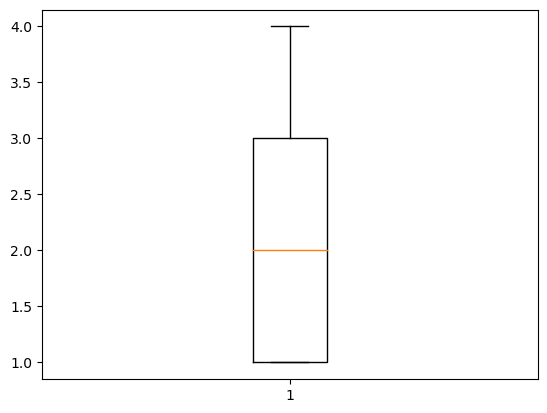

<Figure size 1000x700 with 0 Axes>

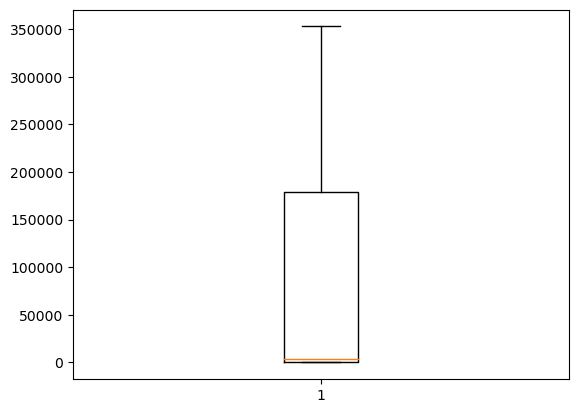

<Figure size 1000x700 with 0 Axes>

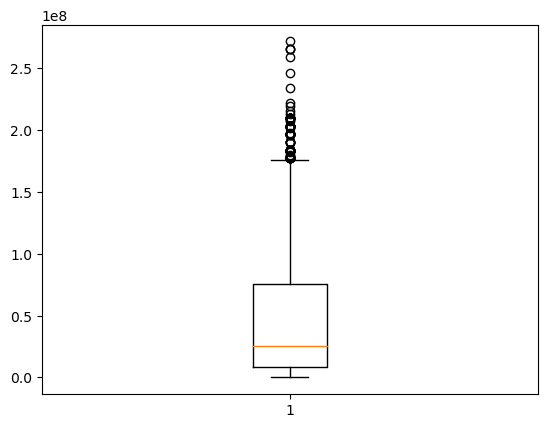

<Figure size 1000x700 with 0 Axes>

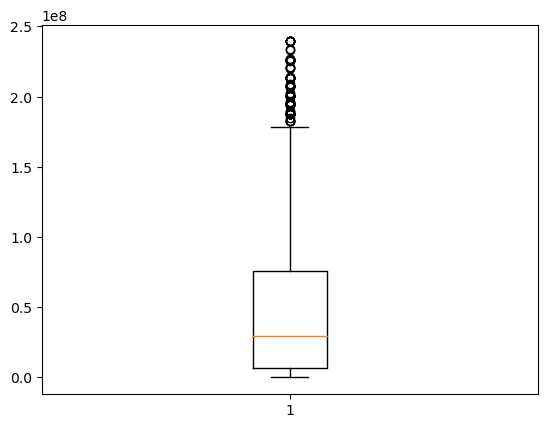

<Figure size 1000x700 with 0 Axes>

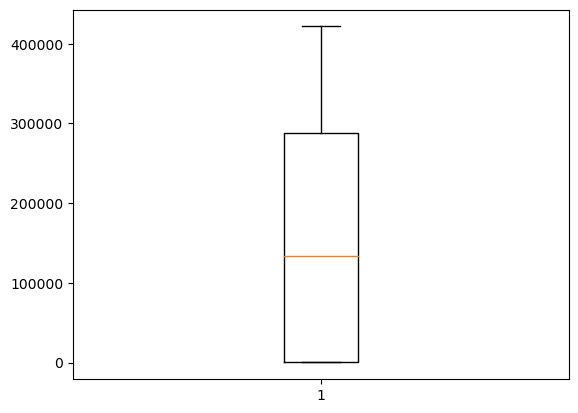

<Figure size 1000x700 with 0 Axes>

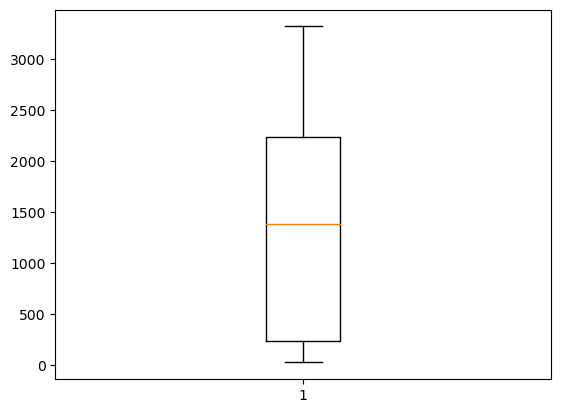

<Figure size 1000x700 with 0 Axes>

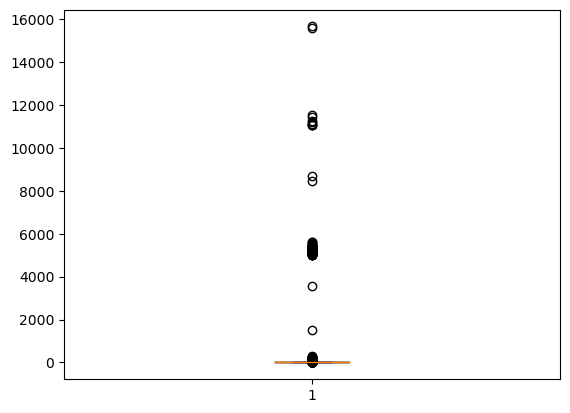

<Figure size 1000x700 with 0 Axes>

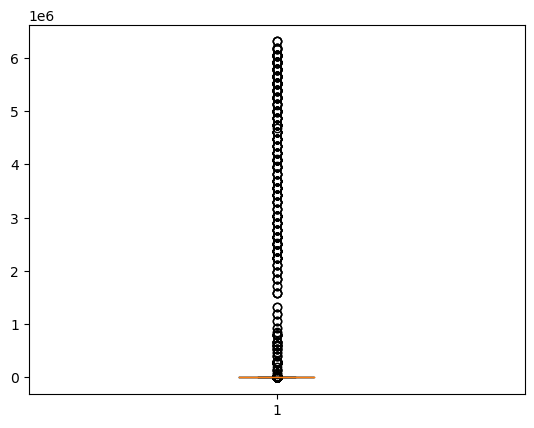

<Figure size 1000x700 with 0 Axes>

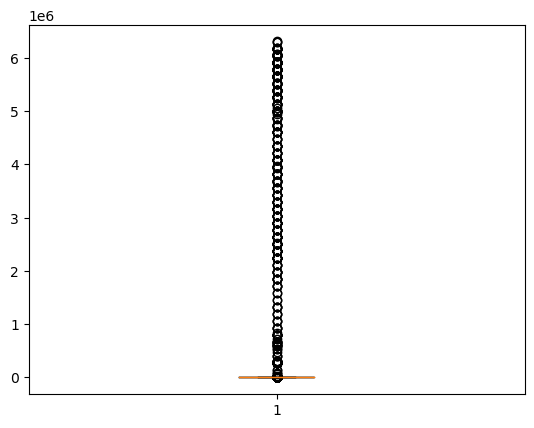

<Figure size 1000x700 with 0 Axes>

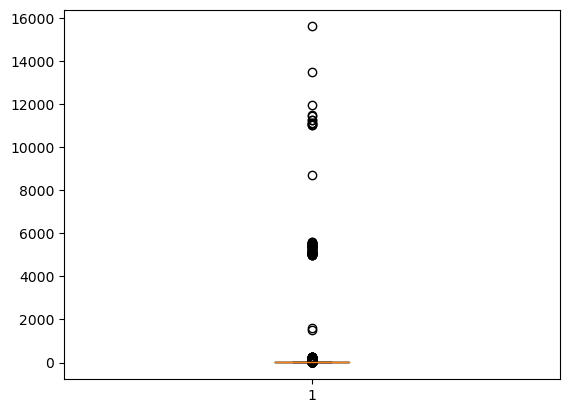

<Figure size 1000x700 with 0 Axes>

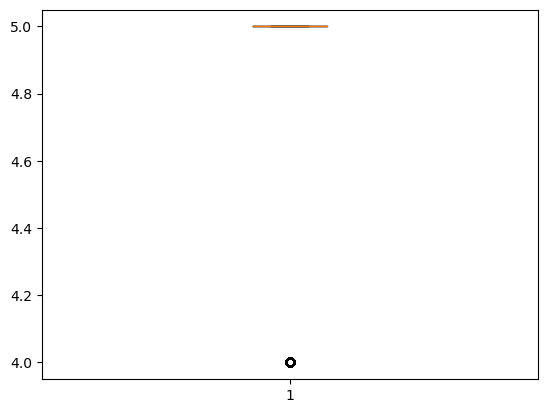

<Figure size 1000x700 with 0 Axes>

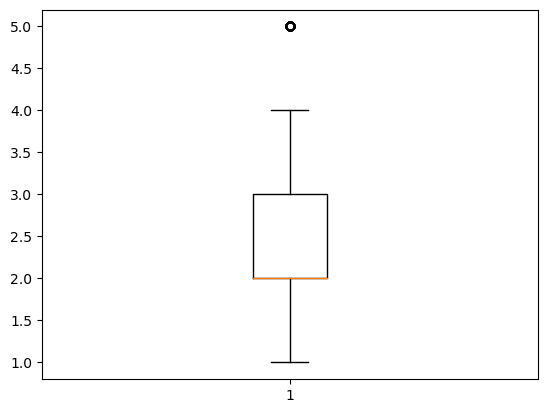

<Figure size 1000x700 with 0 Axes>

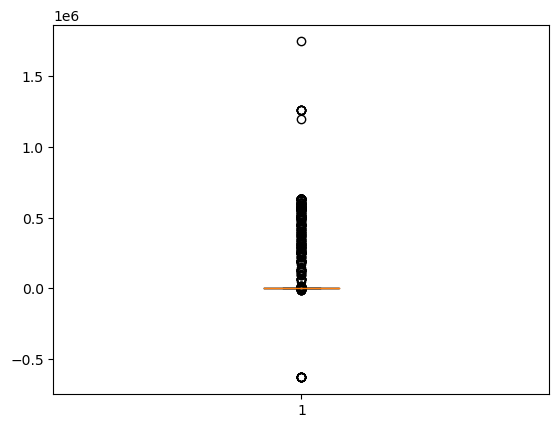

<Figure size 1000x700 with 0 Axes>

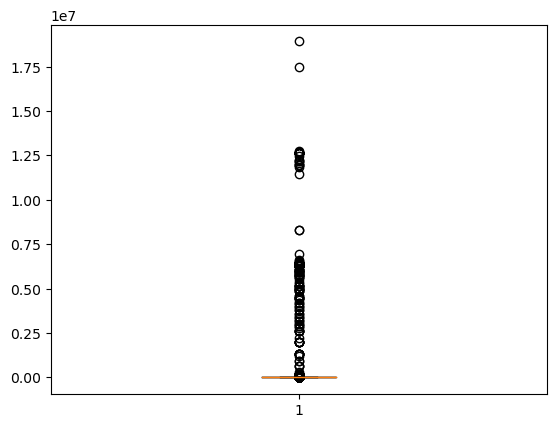

<Figure size 1000x700 with 0 Axes>

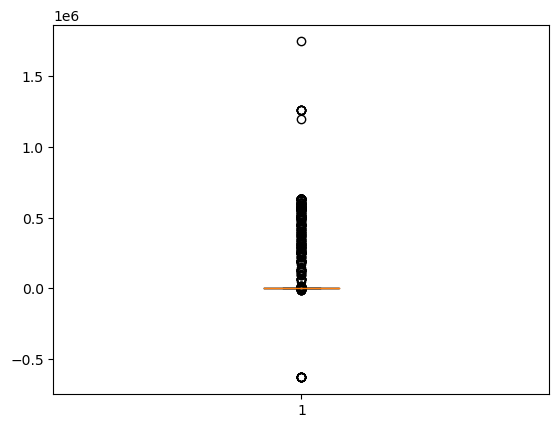

<Figure size 1000x700 with 0 Axes>

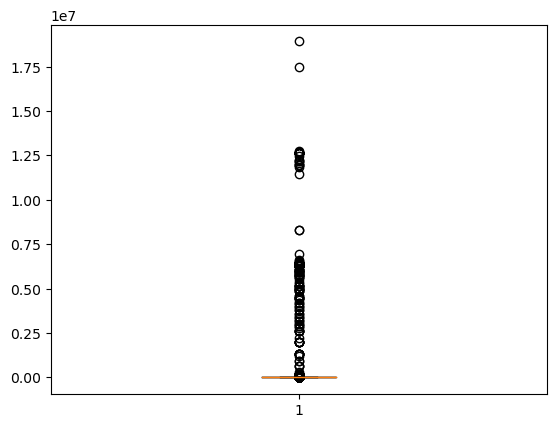

<Figure size 1000x700 with 0 Axes>

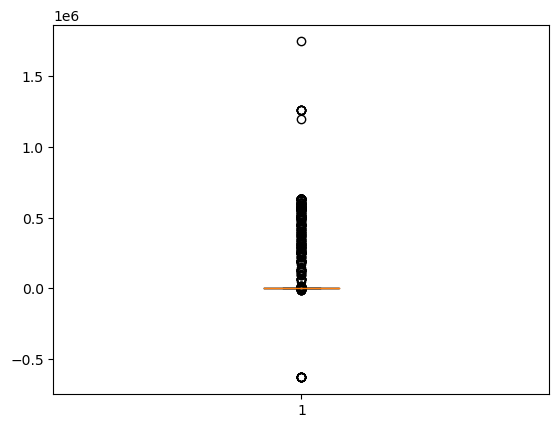

<Figure size 1000x700 with 0 Axes>

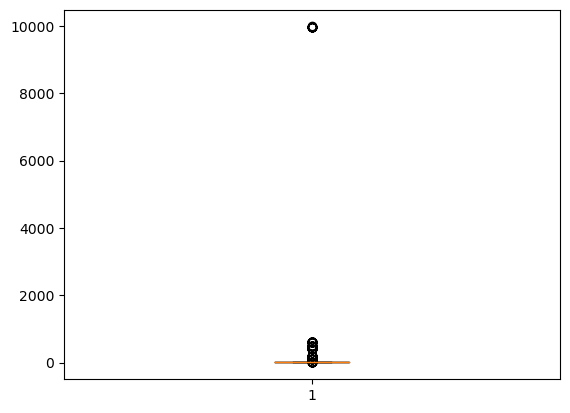

<Figure size 1000x700 with 0 Axes>

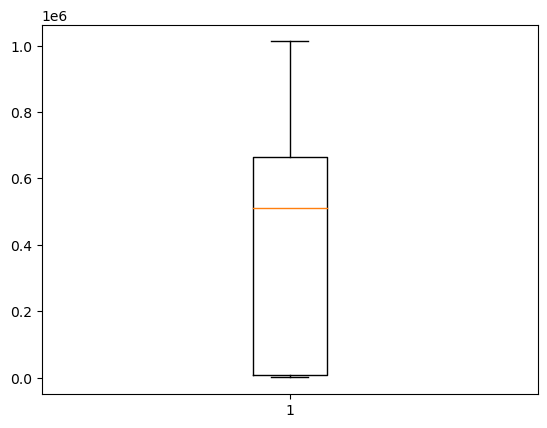

<Figure size 1000x700 with 0 Axes>

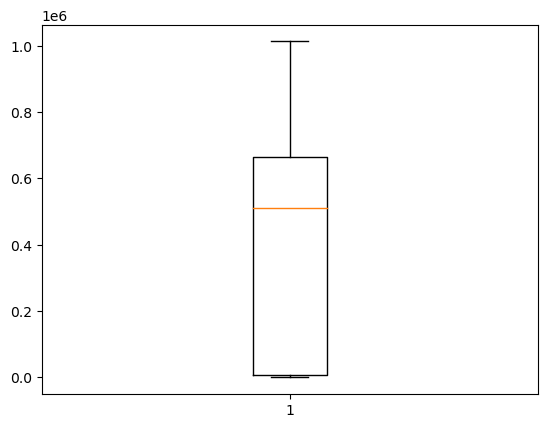

<Figure size 1000x700 with 0 Axes>

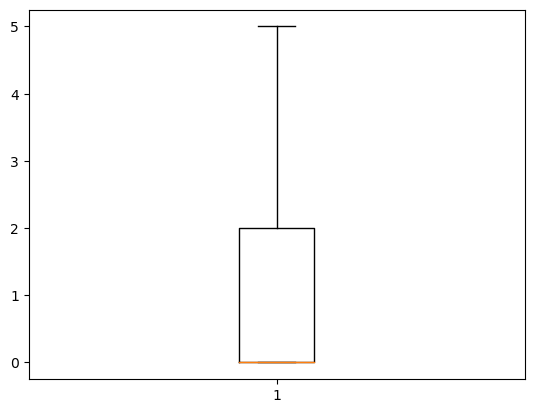

<Figure size 1000x700 with 0 Axes>

In [8]:
for x in data:
    plt.boxplot(data[x])
    fig = plt.figure(figsize =(10, 7))
    plt.show()


Index of column with outlier: 3,4,7,8,9,10,11,12,13,14,15,16,17,18
<br />
<br />From the boxplot we can see this column has outlier:
<br />- Received Bytes
<br />- Sent Bytes
<br />- Delta Received Packets
<br />- Delta Received Bytes
<br />- Delta Sent Bytes
<br />- Delta Sent Packets
<br />- Delta Port alive Duration (S)
<br />- Connection Point
<br />- Total Load/Rate
<br />- Total Load/Latest
<br />- Unknown Load/Rate
<br />- Unknown Load/Latest
<br />- Latest bytes counter
<br />- Active Flow Entries

Drop some column because we only use some of them

In [9]:
data.drop("Delta Received Bytes", inplace=True, axis=1)
data.drop("Delta Sent Bytes", inplace=True, axis=1)
data.drop("Delta Port alive Duration (S)", inplace=True, axis=1)
data.drop("Connection Point", inplace=True, axis=1)
data.drop("Total Load/Rate", inplace=True, axis=1)
data.drop("Total Load/Latest", inplace=True, axis=1)
data.drop("Unknown Load/Rate", inplace=True, axis=1)
data.drop("Unknown Load/Latest", inplace=True, axis=1)
data.drop("Latest bytes counter", inplace=True, axis=1)
data.drop("Active Flow Entries", inplace=True, axis=1)
data.drop("Packets Looked Up", inplace=True, axis=1)
data.drop("Packets Matched", inplace=True, axis=1)

Check data info and type

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Port Number              4998 non-null   int64
 1   Received Packets         4998 non-null   int64
 2   Received Bytes           4998 non-null   int64
 3   Sent Bytes               4998 non-null   int64
 4   Sent Packets             4998 non-null   int64
 5   Port alive Duration (S)  4998 non-null   int64
 6   Delta Received Packets   4998 non-null   int64
 7   Delta Sent Packets       4998 non-null   int64
 8   Label                    4998 non-null   int64
dtypes: int64(9)
memory usage: 351.5 KB


As we can see, Now it has 9 attributes. There are 4998 entries and all of the attributes have int64 as data types.

# Check outlier using Boxplot/IQR
Reference: https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

### Column: Delta Received Packets

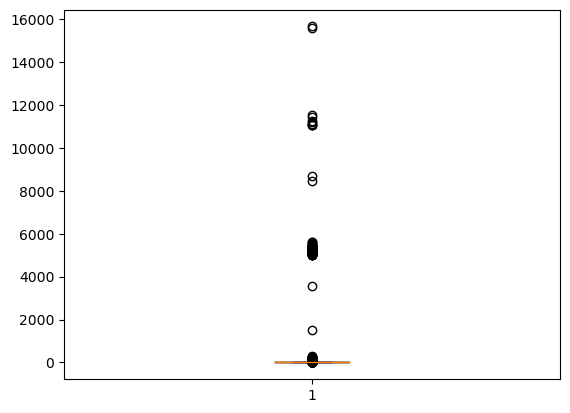

<Figure size 1000x700 with 0 Axes>

In [62]:
plt.boxplot(data["Delta Received Packets"])
fig = plt.figure(figsize =(10, 7))
plt.show()

#### 1.5 IQR Rule

In [63]:
# finding quartile & median
q1 = np.quantile(data["Delta Received Packets"], 0.25)
q3 = np.quantile(data["Delta Received Packets"], 0.75)
med = np.median(data["Delta Received Packets"])

# finding the iqr region
iqr = q3-q1

# finding upper and lower bound
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

# print the result
print('IQR: ', iqr)
print('Upper Bound: ', upper_bound)
print('Lower Bound: ', lower_bound)

IQR:  4.0
Upper Bound:  10.0
Lower Bound:  -6.0


print sample of outlier data

In [64]:
outliers = data["Delta Received Packets"][(data["Delta Received Packets"] <= lower_bound) | (data["Delta Received Packets"] >= upper_bound)]
print('The following are the outliers in the boxplot:{}\n'.format(outliers))

The following are the outliers in the boxplot:1         47
11        43
12        74
20       152
22        57
        ... 
4981    5143
4983     151
4987      39
4988      47
4991      86
Name: Delta Received Packets, Length: 1058, dtype: int64



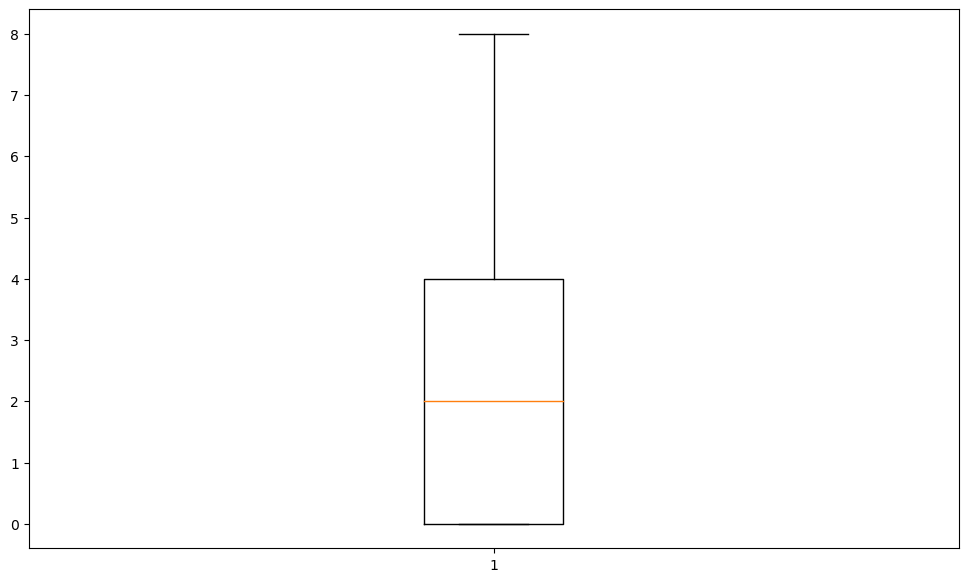

In [65]:
# boxplot of data within the whisker
drp = data["Delta Received Packets"][(data["Delta Received Packets"] >= lower_bound) & (data["Delta Received Packets"] <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(drp)
plt.show()

#### 3 IQR Rule

In [66]:
# finding quartile & median
q1 = np.quantile(data["Delta Received Packets"], 0.25)
q3 = np.quantile(data["Delta Received Packets"], 0.75)
med = np.median(data["Delta Received Packets"])

# finding the iqr region
iqr = q3-q1

# finding upper and lower bound
upper_bound = q3+(3*iqr)
lower_bound = q1-(3*iqr)

# print the result
print('IQR: ', iqr)
print('Upper Bound: ', upper_bound)
print('Lower Bound: ', lower_bound)

IQR:  4.0
Upper Bound:  16.0
Lower Bound:  -12.0


print sample of outlier data

In [67]:
outliers = data["Delta Received Packets"][(data["Delta Received Packets"] <= lower_bound) | (data["Delta Received Packets"] >= upper_bound)]
print('The following are the outliers in the boxplot:{}\n'.format(outliers))

The following are the outliers in the boxplot:1         47
11        43
12        74
20       152
22        57
        ... 
4981    5143
4983     151
4987      39
4988      47
4991      86
Name: Delta Received Packets, Length: 1057, dtype: int64



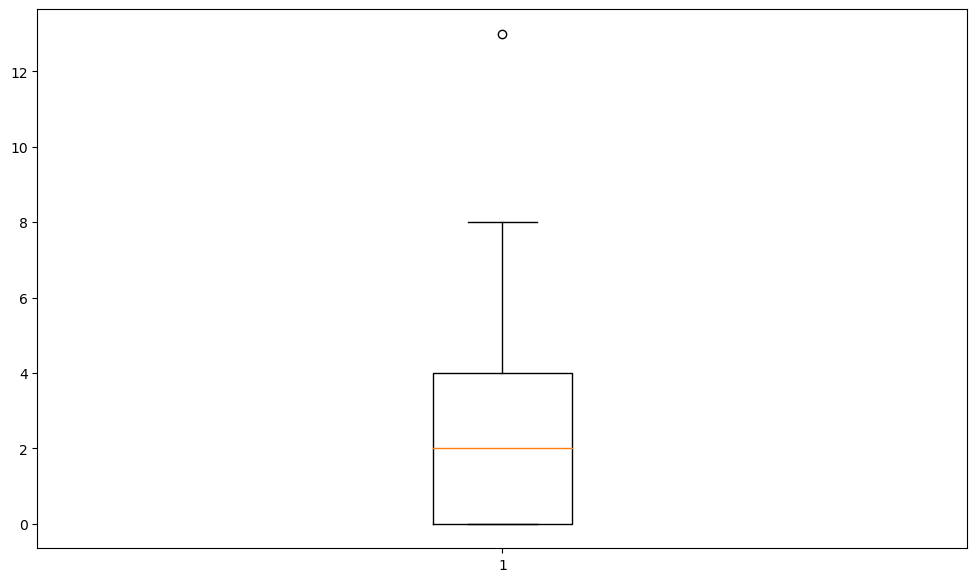

In [68]:
# boxplot of data within the whisker
drp2 = data["Delta Received Packets"][(data["Delta Received Packets"] >= lower_bound) & (data["Delta Received Packets"] <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(drp2)
plt.show()

### Column: Delta Sent Packets

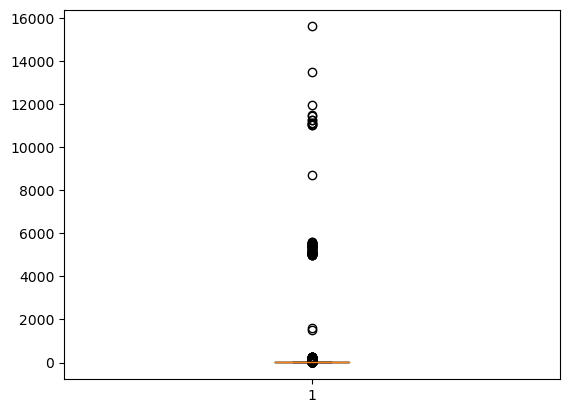

<Figure size 1000x700 with 0 Axes>

In [69]:
plt.boxplot(data["Delta Sent Packets"])
fig = plt.figure(figsize =(10, 7))
plt.show()

#### 1.5 IQR Rule

In [70]:
# finding quartile & median
q1 = np.quantile(data["Delta Sent Packets"], 0.25)
q3 = np.quantile(data["Delta Sent Packets"], 0.75)
med = np.median(data["Delta Sent Packets"])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower bound
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

# print the result
print('IQR: ', iqr)
print('Upper Bound: ', upper_bound)
print('Lower Bound: ', lower_bound)

IQR:  2.0
Upper Bound:  7.0
Lower Bound:  -1.0


print sample of outlier data

In [71]:
outliers = data["Delta Sent Packets"][(data["Delta Sent Packets"] <= lower_bound) | (data["Delta Sent Packets"] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:1        76
2       106
11       66
12       36
13      135
       ... 
4970     74
4977     72
4987     40
4988     37
4991    150
Name: Delta Sent Packets, Length: 952, dtype: int64


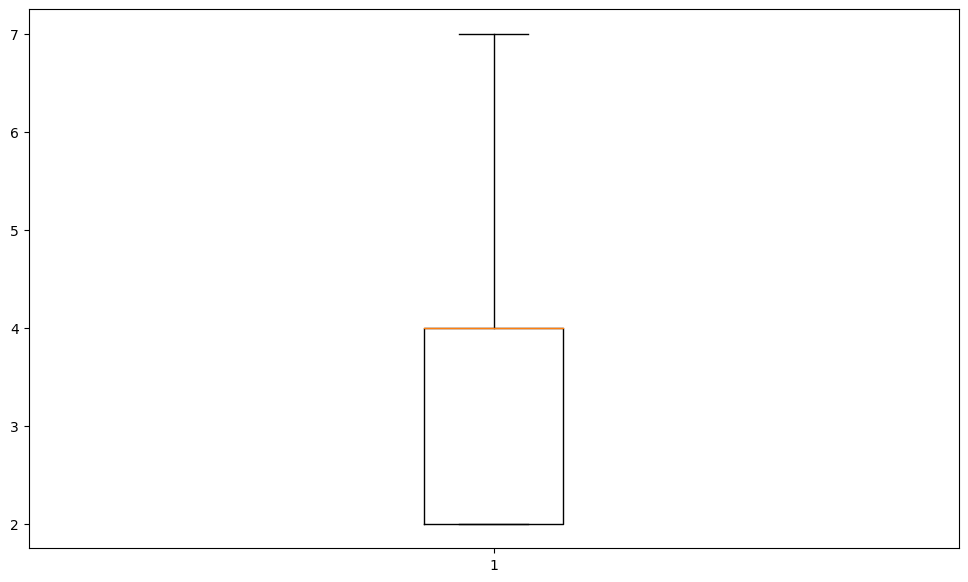

In [72]:
# boxplot of data within the whisker
dsp = data["Delta Sent Packets"][(data["Delta Sent Packets"] >= lower_bound) & (data["Delta Sent Packets"] <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(dsp)
plt.show()

#### 3 IQR Rule

In [73]:
# finding quartile & median
q1 = np.quantile(data["Delta Sent Packets"], 0.25)
q3 = np.quantile(data["Delta Sent Packets"], 0.75)
med = np.median(data["Delta Sent Packets"])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower bound
upper_bound = q3+(3*iqr)
lower_bound = q1-(3*iqr)

# print the result
print('IQR: ', iqr)
print('Upper Bound: ', upper_bound)
print('Lower Bound: ', lower_bound)

IQR:  2.0
Upper Bound:  10.0
Lower Bound:  -4.0


print sample of outlier data

In [74]:
outliers = data["Delta Sent Packets"][(data["Delta Sent Packets"] <= lower_bound) | (data["Delta Sent Packets"] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:1        76
2       106
11       66
12       36
13      135
       ... 
4970     74
4977     72
4987     40
4988     37
4991    150
Name: Delta Sent Packets, Length: 946, dtype: int64


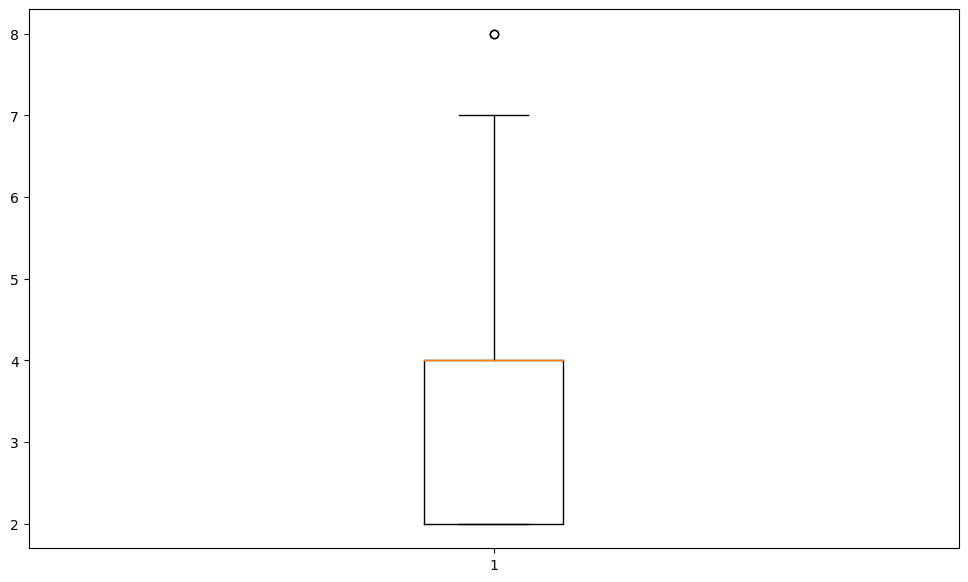

In [75]:
# boxplot of data within the whisker
dsp2 = data["Delta Sent Packets"][(data["Delta Sent Packets"] >= lower_bound) & (data["Delta Sent Packets"] <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(dsp2)
plt.show()

### Column: Sent Bytes

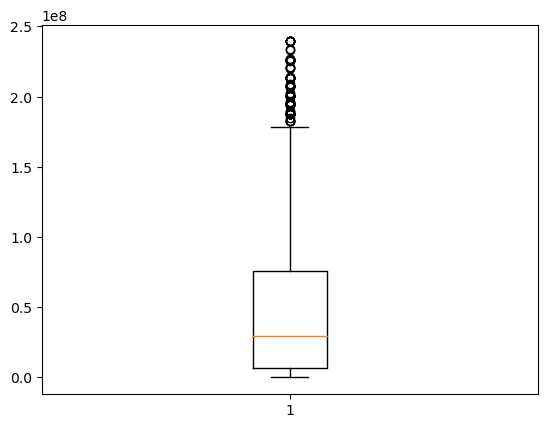

<Figure size 1000x700 with 0 Axes>

In [76]:
plt.boxplot(data["Sent Bytes"])
fig = plt.figure(figsize =(10, 7))
plt.show()

#### 1.5 IQR Rule

In [77]:
# finding quartile & median
q1 = np.quantile(data["Sent Bytes"], 0.25)
q3 = np.quantile(data["Sent Bytes"], 0.75)
med = np.median(data["Sent Bytes"])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower bound
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

# print the result
print('IQR: ', iqr)
print('Upper Bound: ', upper_bound)
print('Lower Bound: ', lower_bound)

IQR:  69548912.75
Upper Bound:  180420998.125
Lower Bound:  -97774652.875


print sample of outlier data

In [78]:
outliers = data["Sent Bytes"][(data["Sent Bytes"] <= lower_bound) | (data["Sent Bytes"] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:82      195049937
133     226606645
211     207682761
262     225699174
654     187720917
          ...    
4827    239230825
4833    194129349
4882    187720077
4918    225712253
4993    195046297
Name: Sent Bytes, Length: 104, dtype: int64


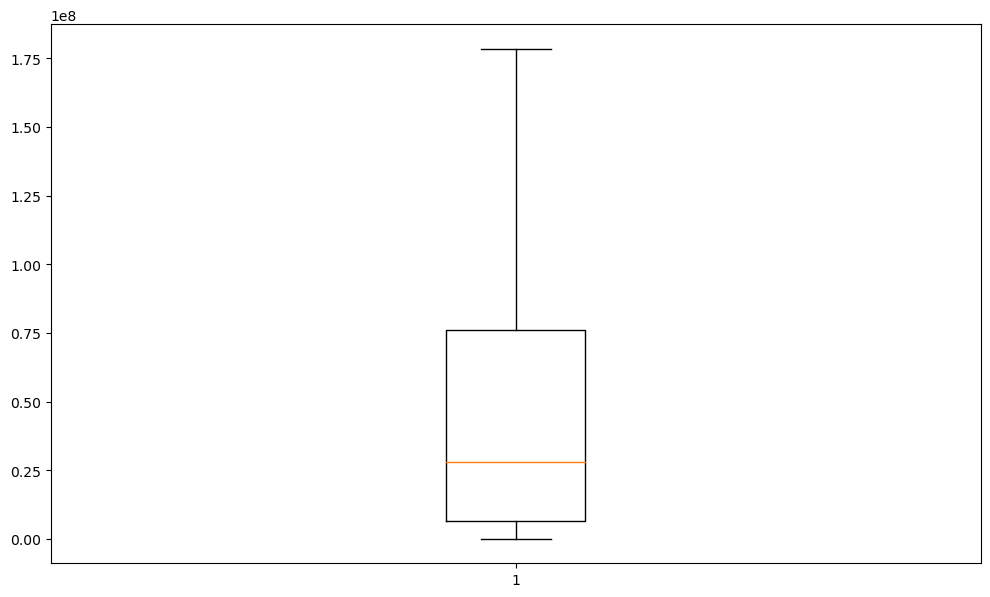

In [79]:
# boxplot of data within the whisker
sb = data["Sent Bytes"][(data["Sent Bytes"] >= lower_bound) & (data["Sent Bytes"] <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(sb)
plt.show()

#### 3 IQR Rule

In [80]:
# finding quartile & median
q1 = np.quantile(data["Sent Bytes"], 0.25)
q3 = np.quantile(data["Sent Bytes"], 0.75)
med = np.median(data["Sent Bytes"])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower bound
upper_bound = q3+(3*iqr)
lower_bound = q1-(3*iqr)

# print the result
print('IQR: ',iqr)
print('Upper Bound: ', upper_bound)
print('Lower Bound: ', lower_bound)

IQR:  69548912.75
Upper Bound:  284744367.25
Lower Bound:  -202098022.0


print sample of outlier data

In [81]:
outliers = data["Sent Bytes"][(data["Sent Bytes"] <= lower_bound) | (data["Sent Bytes"] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:Series([], Name: Sent Bytes, dtype: int64)


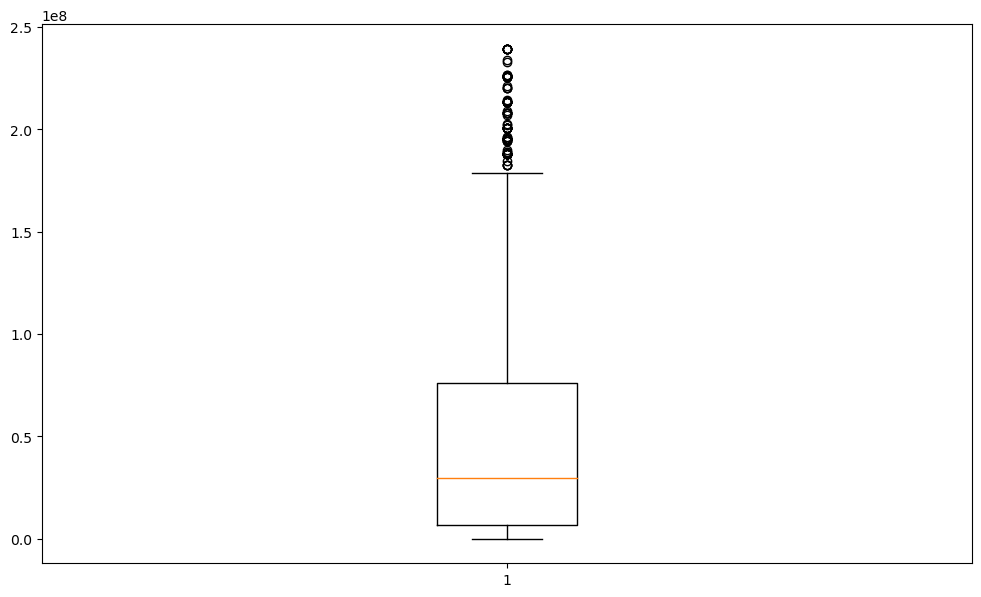

In [82]:
# boxplot of data within the whisker
sb2 = data["Sent Bytes"][(data["Sent Bytes"] >= lower_bound) & (data["Sent Bytes"] <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(sb2)
plt.show()

So, using the IQR method, we can see the outlier in each column from the dataset. We can use 1.5 or 3 to set the upper bound and lower bound, the difference is if we use 1.5 it will more effective. Also we can use boxplot to show the visualization.

# Check outlier using Local Outlier Factor (LOF)
Reference: https://arshren.medium.com/anomaly-detection-using-local-outlier-factor-4e52f16894f

In [32]:
data

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Sent Packets,Label
0,4,305111,25506841,100234870,284579,1657,2,4,0
1,2,209,20671,6316631,274,96,47,76,3
2,4,150,19774,6475473,3054,166,4,106,2
3,1,4699,100986365,124574097,413351,2267,0,2,0
4,3,990,104058,88896,778,792,4,4,1
...,...,...,...,...,...,...,...,...,...
4993,3,180657,158912655,195046297,291446,2597,2,4,0
4994,1,180388,51777654,12692793,299993,1700,2,4,0
4995,2,3051,31735692,140143,1046,1496,4,4,1
4996,3,183279,209436883,101192774,156080,2890,4,4,0


Creating input and target variables (X, Y)

In [33]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]

Reducing the dimension using Principal Component Analysis(PCA) for visualization

In [34]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

### metric = "manhattan", contamination = 0.1 , n_neighbors = 20

In [35]:
# fit the model for outlier detection 
clf = LocalOutlierFactor(n_neighbors = 20, metric = "manhattan", contamination = 0.1)

In [36]:
# use fit_predict to compute the predicted labels of the training samples

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

In [37]:
print("Outlier(-1) :", np.sum(y_pred == -1))
print("Inlier(1)   :", np.sum(y_pred == 1))

Outlier(-1) : 500
Inlier(1)   : 4498


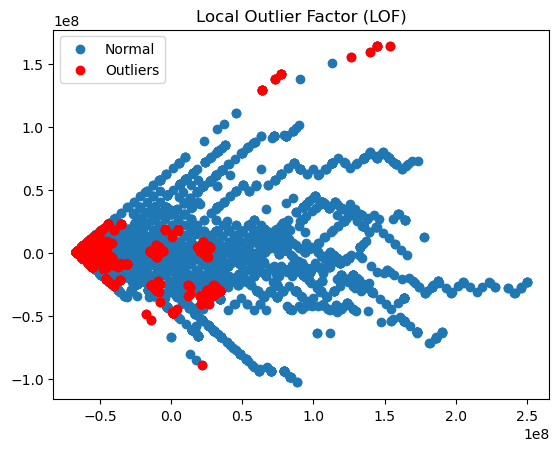

In [38]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper left")
plt.show()

Outlier visualization

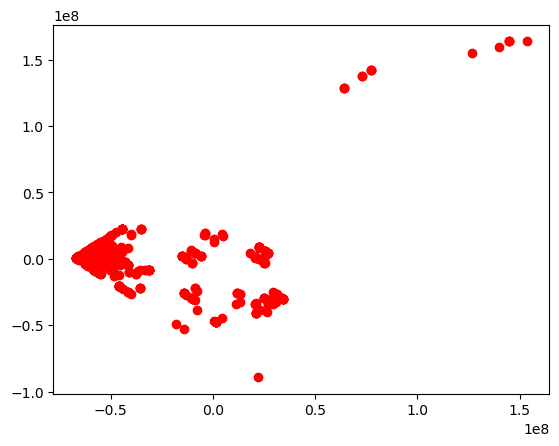

In [39]:
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")

### metric = "manhattan", contamination = 'auto', n_neighbors = 20

In [40]:
# fit the model for outlier detection 
clf = LocalOutlierFactor(n_neighbors = 20, metric = "manhattan", contamination = 'auto')

In [41]:
# use fit_predict to compute the predicted labels of the training samples

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

In [42]:
print("Outlier(-1) :", np.sum(y_pred == -1))
print("Inlier(1)   :", np.sum(y_pred == 1))

Outlier(-1) : 881
Inlier(1)   : 4117


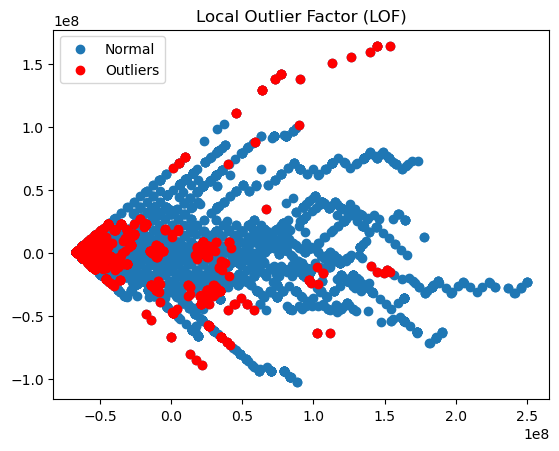

In [43]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper left")
plt.show()

outlier visualization

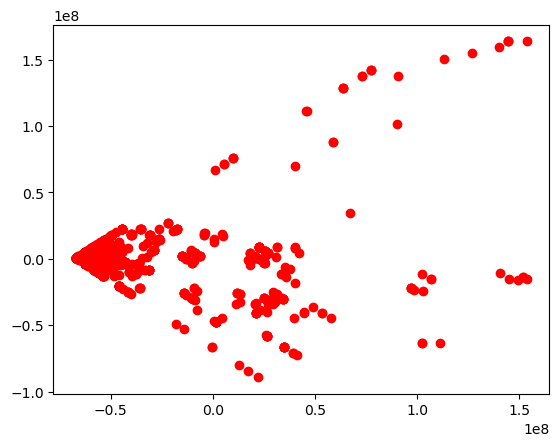

In [44]:
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")

### metric = "minkowski", contamination = 0.1, n_neighbors = 20

In [45]:
# fit the model for outlier detection 
clf = LocalOutlierFactor(n_neighbors = 20, metric = "minkowski", contamination = 0.1)

In [46]:
# use fit_predict to compute the predicted labels of the training samples

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

In [47]:
print("Outlier(-1) :", np.sum(y_pred == -1))
print("Inlier(1)   :", np.sum(y_pred == 1))

Outlier(-1) : 500
Inlier(1)   : 4498


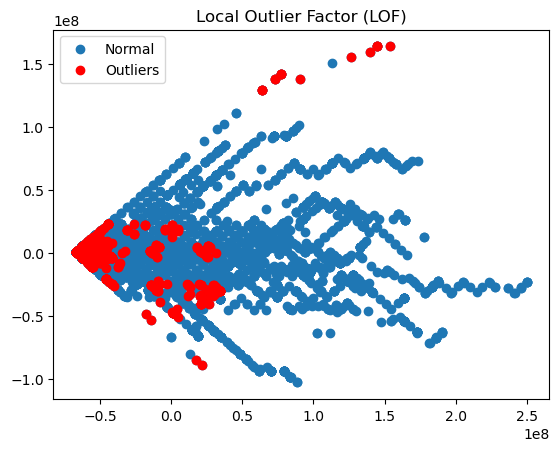

In [48]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper left")
plt.show()

Outlier visualization

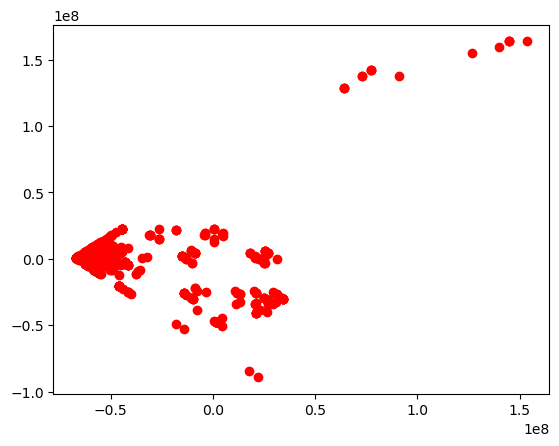

In [49]:
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")

### metric = "minkowski", contamination = 'auto', n_neighbors = 20

In [50]:
# fit the model for outlier detection 
clf = LocalOutlierFactor(n_neighbors = 20, metric = "minkowski", contamination = 'auto')

In [51]:
# use fit_predict to compute the predicted labels of the training samples

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

In [52]:
print("Outlier(-1) :", np.sum(y_pred == -1))
print("Inlier(1)   :", np.sum(y_pred == 1))

Outlier(-1) : 845
Inlier(1)   : 4153


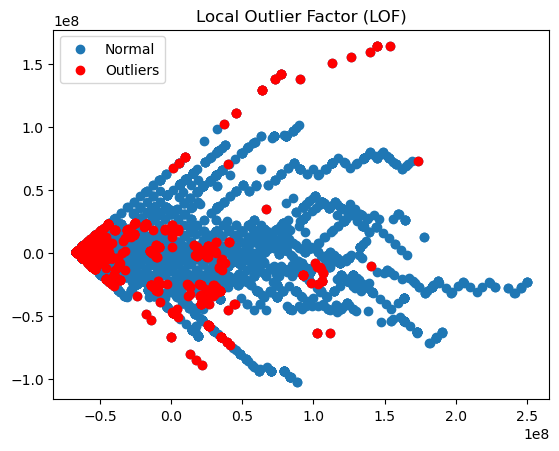

In [53]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper left")
plt.show()

Outlier visualization

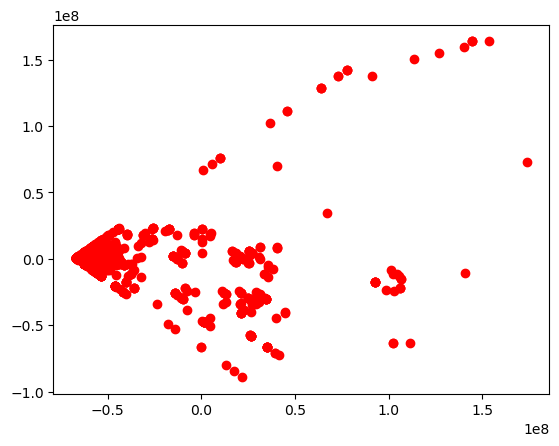

In [54]:
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")

LOF identifies local outliers by comparing the local density of a point o with the local densities of its k neighbors. We can also set the segment of the outliers with the value of contamination. Beside of that we can choose metric between minkowski, manhattan. The outliers are 500 rows when we set the contamination = 0.1 and metric = "manhattan", while it has auto as contamination the outlier are 881. If we use metric "minkowski" and contamination = 0.1 we get 500 rows of outliers, while it has auto as contamination the outlier are 845.

# Check outlier using Isolation Forest
reference: https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562

Isolation Forest is a popular unsupervised machine learning algorithm for detecting anomalies (outliers) within datasets. We can adjust the contamination value to get different outlier values.

### contamination = 0.1, n_estimators = 100

In [56]:
# specify the column names to be used for modelling
model_columns=data.columns[0:8]

clf=IsolationForest(n_estimators=100, contamination=float(0.1), random_state=11)
clf.fit(data[model_columns])
pred = clf.predict(data[model_columns])

In [57]:
print("Outlier(-1) :", np.sum(pred == -1))
print("Inlier(1)   :", np.sum(pred == 1))

Outlier(-1) : 500
Inlier(1)   : 4498


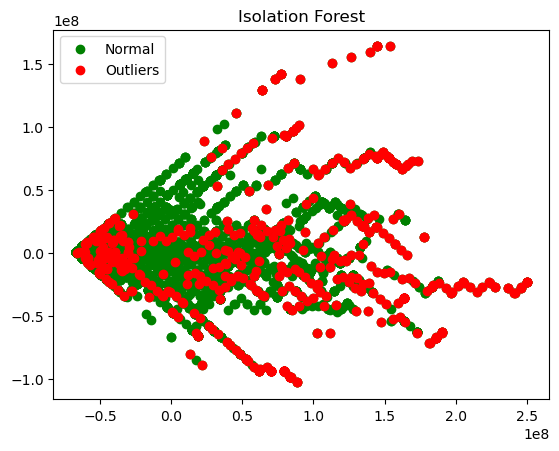

In [58]:
lofs_index = np.where(pred!=1)
values = X_pca[lofs_index]
plt.title("Isolation Forest")
plt.scatter(X_pca[:,0], X_pca[:,1], color='green', label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper left")
plt.show()

### contamination = 'auto', n_estimators = 100

In [59]:
# specify the column names to be used for modelling
model_columns=data.columns[0:8]

clf=IsolationForest(n_estimators=100, contamination='auto', random_state=11)
clf.fit(data[model_columns])
pred = clf.predict(data[model_columns])

In [60]:
print("Outlier(-1) :", np.sum(pred == -1))
print("Inlier(1)   :", np.sum(pred == 1))

Outlier(-1) : 1195
Inlier(1)   : 3803


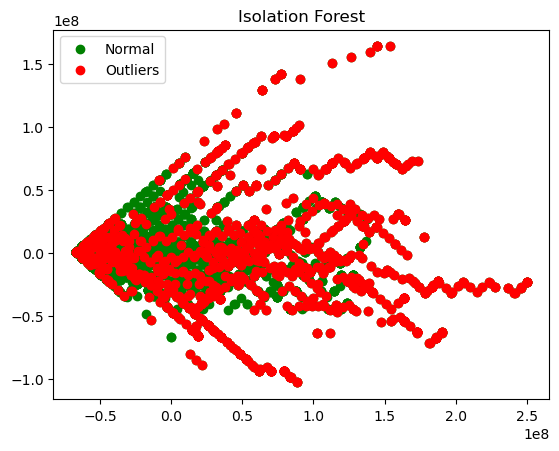

In [61]:
lofs_index = np.where(pred!=1)
values = X_pca[lofs_index]
plt.title("Isolation Forest")
plt.scatter(X_pca[:,0], X_pca[:,1], color='green', label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper left")
plt.show()

We can see there are 500 outliers when we set contamination = 0.1 and 1195 outliers when we set contamination to 'auto'.

## Conclusion

Both using Outlier factor mothods and Isolation forest we can set the contamination value which will affect how many values of outliers are generated. In addition, in the Isolation forest method we can choose the metric between Manhattan and Minkowski and can also determine the value of n neighbors.  For boxplots we can easily check whether there are outliers in a column, to get the detailed value of the outliers we can combine it with IQR.